In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import data

### import the network data

In [2]:
fn = 'wiki-talk-temporal.txt'
f = open(fn, 'r')
edges = []
with_timestamp = []
# for i in range(4):
#     line = f.readline()
for line in f.readlines():
    line_list = line.strip().split()
#     print(line_list)
    node_from = int(line_list[0])
    node_to = int(line_list[1])
    timestamp = int(line_list[2])
    edges.append((node_from, node_to))
    with_timestamp.append((node_from, node_to, timestamp))
f.close()
edges

[(0, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 8),
 (9, 10),
 (11, 10),
 (12, 10),
 (7, 10),
 (5, 10),
 (5, 10),
 (13, 14),
 (4, 14),
 (15, 14),
 (16, 17),
 (13, 18),
 (7, 18),
 (7, 18),
 (19, 20),
 (21, 20),
 (7, 20),
 (7, 20),
 (13, 22),
 (7, 22),
 (7, 22),
 (23, 22),
 (24, 22),
 (25, 22),
 (26, 22),
 (27, 22),
 (28, 28),
 (13, 29),
 (30, 29),
 (31, 29),
 (7, 29),
 (32, 29),
 (33, 33),
 (34, 33),
 (33, 33),
 (33, 33),
 (33, 33),
 (35, 33),
 (36, 33),
 (7, 33),
 (4, 33),
 (37, 38),
 (39, 38),
 (40, 38),
 (7, 38),
 (41, 42),
 (42, 42),
 (42, 42),
 (35, 42),
 (43, 43),
 (43, 43),
 (43, 43),
 (44, 43),
 (43, 43),
 (7, 43),
 (7, 43),
 (45, 43),
 (46, 47),
 (47, 47),
 (47, 47),
 (13, 47),
 (7, 47),
 (48, 47),
 (5, 47),
 (49, 47),
 (50, 51),
 (52, 51),
 (53, 51),
 (54, 51),
 (51, 51),
 (36, 51),
 (55, 51),
 (5, 51),
 (6, 51),
 (6, 51),
 (56, 57),
 (5, 57),
 (58, 59),
 (60, 59),
 (59, 59),
 (60, 59),
 (28, 28),
 (13, 28),
 (7, 28),
 (6, 28),
 (6, 28),
 (61, 28),
 (62, 28),
 (63, 

In [3]:
len(edges)

7833140

In [4]:
# generate graph
G = nx.DiGraph()
G.add_edges_from(edges)

### import the name data

In [5]:
name_file = 'wiki-talk-temporal-usernames.txt'
file = open(name_file, 'r')
name_l = []
for line in file.readlines():
    line_list = line.strip().split()
#     print(line_list)
    node = int(line_list[0])
    try:
        name = line_list[1]
    except:
        name = "EmptyName!"
#     print(node)
    name_l.append((node, name))
file.close()

In [6]:
name_df = pd.DataFrame(name_l, columns=["node", "name"])
name_df

,node,name
0,0,Tbc
1,1,AnonymousCoward
2,2,Andre_Engels
3,3,Zoe
4,4,Guanabot
5,5,Jnc
6,6,Fvw
7,7,Texture
8,8,Alan_D
9,9,F._Lee_Horn


### import the network with timestamps

In [7]:
tf = pd.DataFrame(with_timestamp, columns=["from_node", "to_node", "timestamp"])
tf['timestamp_time'] = pd.to_datetime(tf['timestamp'],unit='s')
tf.sort_values(by="timestamp_time")

,from_node,to_node,timestamp,timestamp_time
85,59,59,999130846,2001-08-30 00:20:46
47,37,38,1002859878,2001-10-12 04:11:18
0,0,1,1003638700,2001-10-21 04:31:40
64,47,47,1004506363,2001-10-31 05:32:43
65,47,47,1004507576,2001-10-31 05:52:56
51,41,42,1006205605,2001-11-19 21:33:25
52,42,42,1006206270,2001-11-19 21:44:30
53,42,42,1006206443,2001-11-19 21:47:23
54,35,42,1006206853,2001-11-19 21:54:13
20,19,20,1007186550,2001-12-01 06:02:30


## In and Out degree distribution

### Linear Binning

In [8]:
plt.style.use('fivethirtyeight')

In [9]:
def draw_degree_dist(G, nbins, ax, label, log = True, norm = False, in_degree = True):
    if in_degree:
        in_deg = np.array([degree for (node, degree) in G.in_degree()])
        max_in = max(in_deg)
        min_in = min(in_deg)
        print(f'in degree: {[min_in, np.mean(in_deg), max_in]}')
        binrange = np.exp(np.linspace(np.log(min_in+1), np.log(max_in+1), nbins)) -1

        bincount, binrange, _ = ax.hist(in_deg, log = log, bins = binrange, alpha = 0.5, label = label, density = norm)
        if log:
            ax.set_xscale('log')

        return bincount, binrange
    else:
        out = np.array([degree for (node, degree) in G.out_degree()])
        max_out = max(out)
        min_out = min(out)
        print(f'out degree: {[min_out, np.mean(out), max_out]}')
        binrange = np.exp(np.linspace(np.log(min_out+1), np.log(max_out+1), nbins)) -1
        bincount, binrange, _  = ax.hist(out, log = log, bins = binrange, alpha = 0.5, label = label)
        if log:
            ax.set_xscale('log')

        return bincount, binrange

in degree: [0, 2.9027714798679822, 3316]
out degree: [0, 2.9027714798679822, 141884]


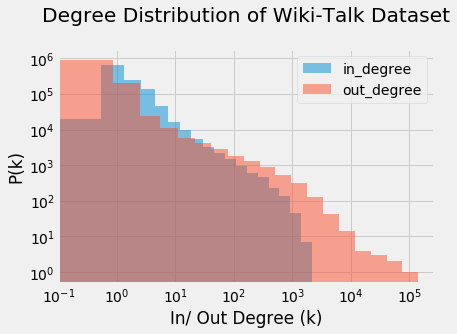

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
nbins = 20
plt.title("Degree Distribution of Wiki-Talk Dataset\n")
plt.xlabel("In/ Out Degree (k)")
plt.ylabel("P(k)")
draw_degree_dist(G, nbins, ax, 'in_degree', in_degree=True)
# bar_SC, bin_SC = draw_idegree_dist(SC, nbins, ax, 'Social')
draw_degree_dist(G, nbins, ax, 'out_degree', in_degree=False)
ax.legend()
ax.set_xlim(1e-1)
plt.savefig("degree-dist.png")

The average in/ out degree is 2.0971606487678462.

### Log-binning & scale-free property

Slope of fitted line of in-degree: -2.380217438352039
Slope of fitted line of out-degree: -2.2132539578732007


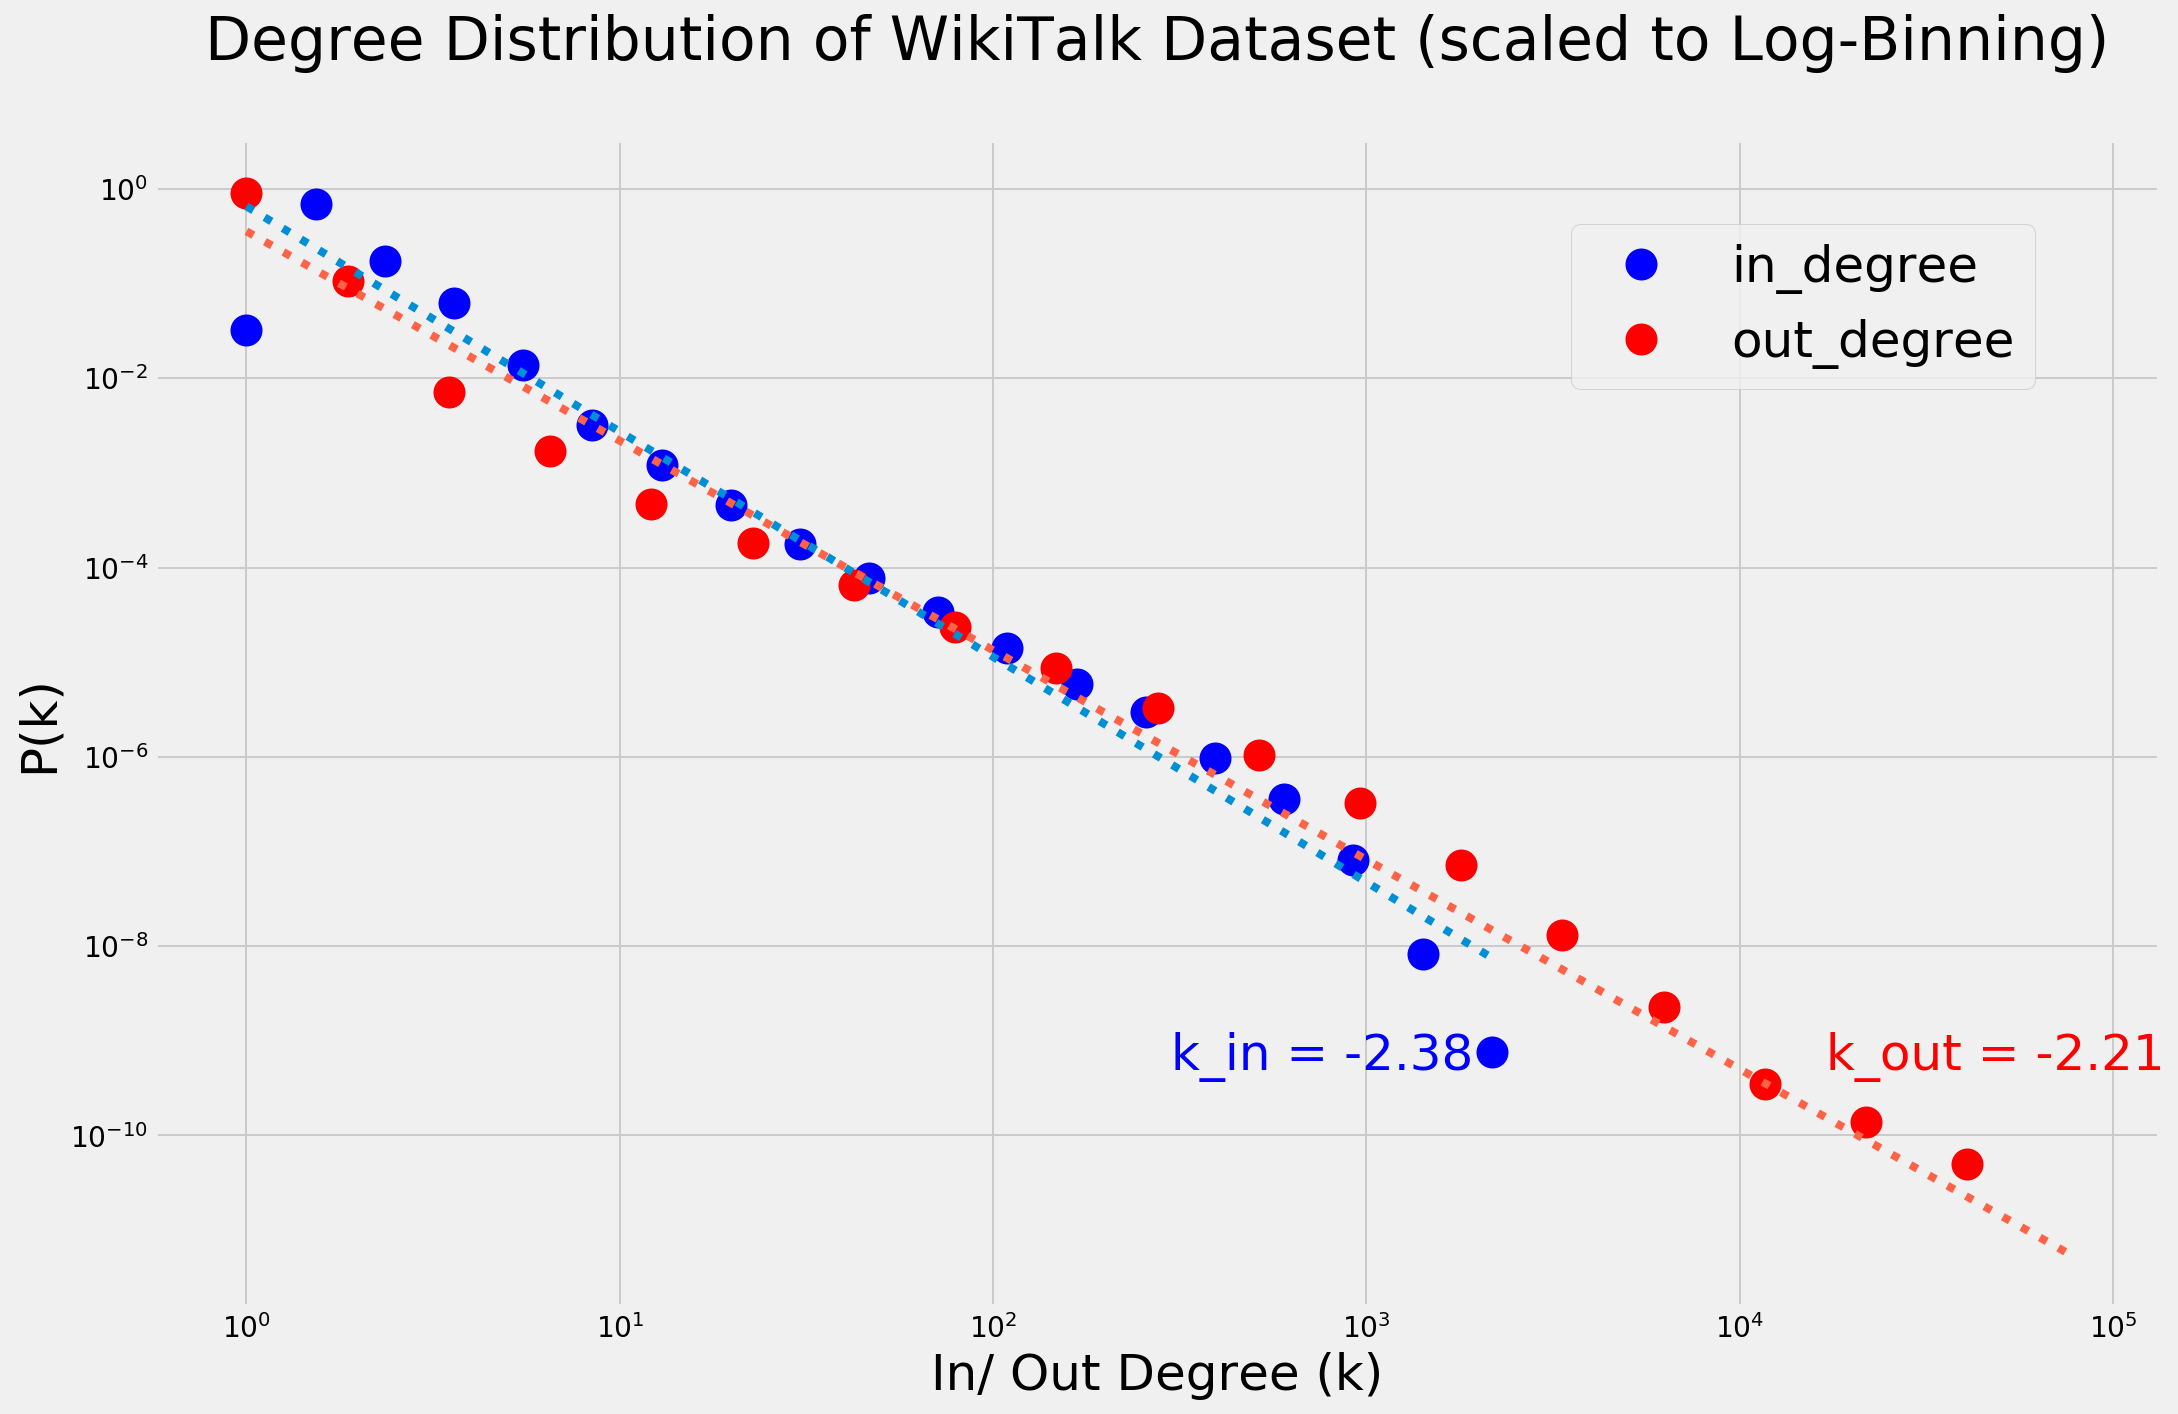

In [11]:
in_deg = [degree+1 for (node, degree) in G.in_degree()]
in_kmin=min(in_deg)
in_kmax=max(in_deg)

out_deg = [degree+1 for (node, degree) in G.out_degree()]
out_kmin=min(out_deg)
out_kmax=max(out_deg)

in_logBins = np.logspace(np.log10(in_kmin), np.log10(in_kmax), num=20)
in_logBinDensity, in_binedges = np.histogram(in_deg, bins=in_logBins, density=True)
in_logBins = np.delete(in_logBins, -1)

out_logBins = np.logspace(np.log10(out_kmin), np.log10(out_kmax), num=20)
out_logBinDensity, out_binedges = np.histogram(out_deg, bins=out_logBins, density=True)
out_logBins = np.delete(out_logBins, -1)

fig1 = plt.figure(figsize=(16,10), dpi=144)
ax = fig1.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

ind = plt.plot(in_logBins, in_logBinDensity, 'o', color='blue', markersize=15)
outd = plt.plot(out_logBins, out_logBinDensity, 'o', color='red', markersize=15)
plt.title("Degree Distribution of WikiTalk Dataset (scaled to Log-Binning)\n", fontsize=30)
plt.xlabel("In/ Out Degree (k)", fontsize=25)
plt.ylabel("P(k)", fontsize=25)

# draw the blue fitted line
in_m, in_c = np.polyfit(np.log(in_logBins), np.log(in_logBinDensity), 1) # fit log(y) = m*log(x) + c
in_y_fit = in_m * np.log(in_logBins) + in_c # calculate the fitted values of y 
line1 = plt.plot(in_logBins, np.exp(in_y_fit), ':')
plt.annotate("k_in = {:.2f}".format(in_m), xy=(300,0.0000000005), xycoords='data', color="blue", fontsize=25)

# draw the red fitted line
out_logBinDensity[-1] = 1e-13
out_m, out_c = np.polyfit(np.log(out_logBins), np.log(out_logBinDensity), 1) # fit log(y) = m*log(x) + c
out_y_fit = out_m * np.log(out_logBins) + out_c # calculate the fitted values of y 
line2 = plt.plot(out_logBins, np.exp(out_y_fit), ':', color="tomato")
plt.annotate("k_out = {:.2f}".format(out_m), xy=(17000,0.0000000005), xycoords='data', color="red", fontsize=25)

print("Slope of fitted line of in-degree:", in_m)
print("Slope of fitted line of out-degree:", out_m)

L = plt.legend([ind, outd], bbox_to_anchor=(0.95,0.95),prop={'size': 25})
L.get_texts()[0].set_text('in_degree')
L.get_texts()[1].set_text('out_degree')
plt.show()
fig1.savefig("log_bin.png")

## Is a large sender also a large receiver?

In [12]:
def round_to_tenth(number):
    return round(number * 10.0) / 10.0

In [13]:
edf = pd.DataFrame(edges, columns=["from_node", "to_node"])
edf.head()

,from_node,to_node
0,0,1
1,2,1
2,3,1
3,4,1
4,5,1


In [14]:
edf_g = edf.groupby("from_node").agg({"to_node": ["count"]})
edf_g.columns = ['_'.join(t) if t[1]!='' else t[0] for t in edf_g.columns]
edf_g = edf_g.reset_index()
edf_g.head()

,from_node,to_node_count
0,0,1
1,2,275
2,3,5104
3,4,104
4,5,1341


In [15]:
edf_g2 = edf.groupby("to_node").agg({"from_node": ["count"]})
edf_g2.columns = ['_'.join(t) if t[1]!='' else t[0] for t in edf_g2.columns]
edf_g2 = edf_g2.reset_index()
edf_g2.head()

,to_node,from_node_count
0,0,1
1,1,6
2,2,301
3,3,4401
4,4,10


In [16]:
inout = pd.merge(edf_g, edf_g2, how="right",left_on="from_node", right_on="to_node")
inout = inout.sort_values(by="to_node").drop(columns="from_node").reset_index(drop=True).fillna(0)
inout.head(10)

,to_node_count,to_node,from_node_count
0,1.0,0,1
1,0.0,1,6
2,275.0,2,301
3,5104.0,3,4401
4,104.0,4,10
5,1341.0,5,857
6,1766.0,6,52
7,1602.0,7,1230
8,0.0,8,1
9,1.0,9,6


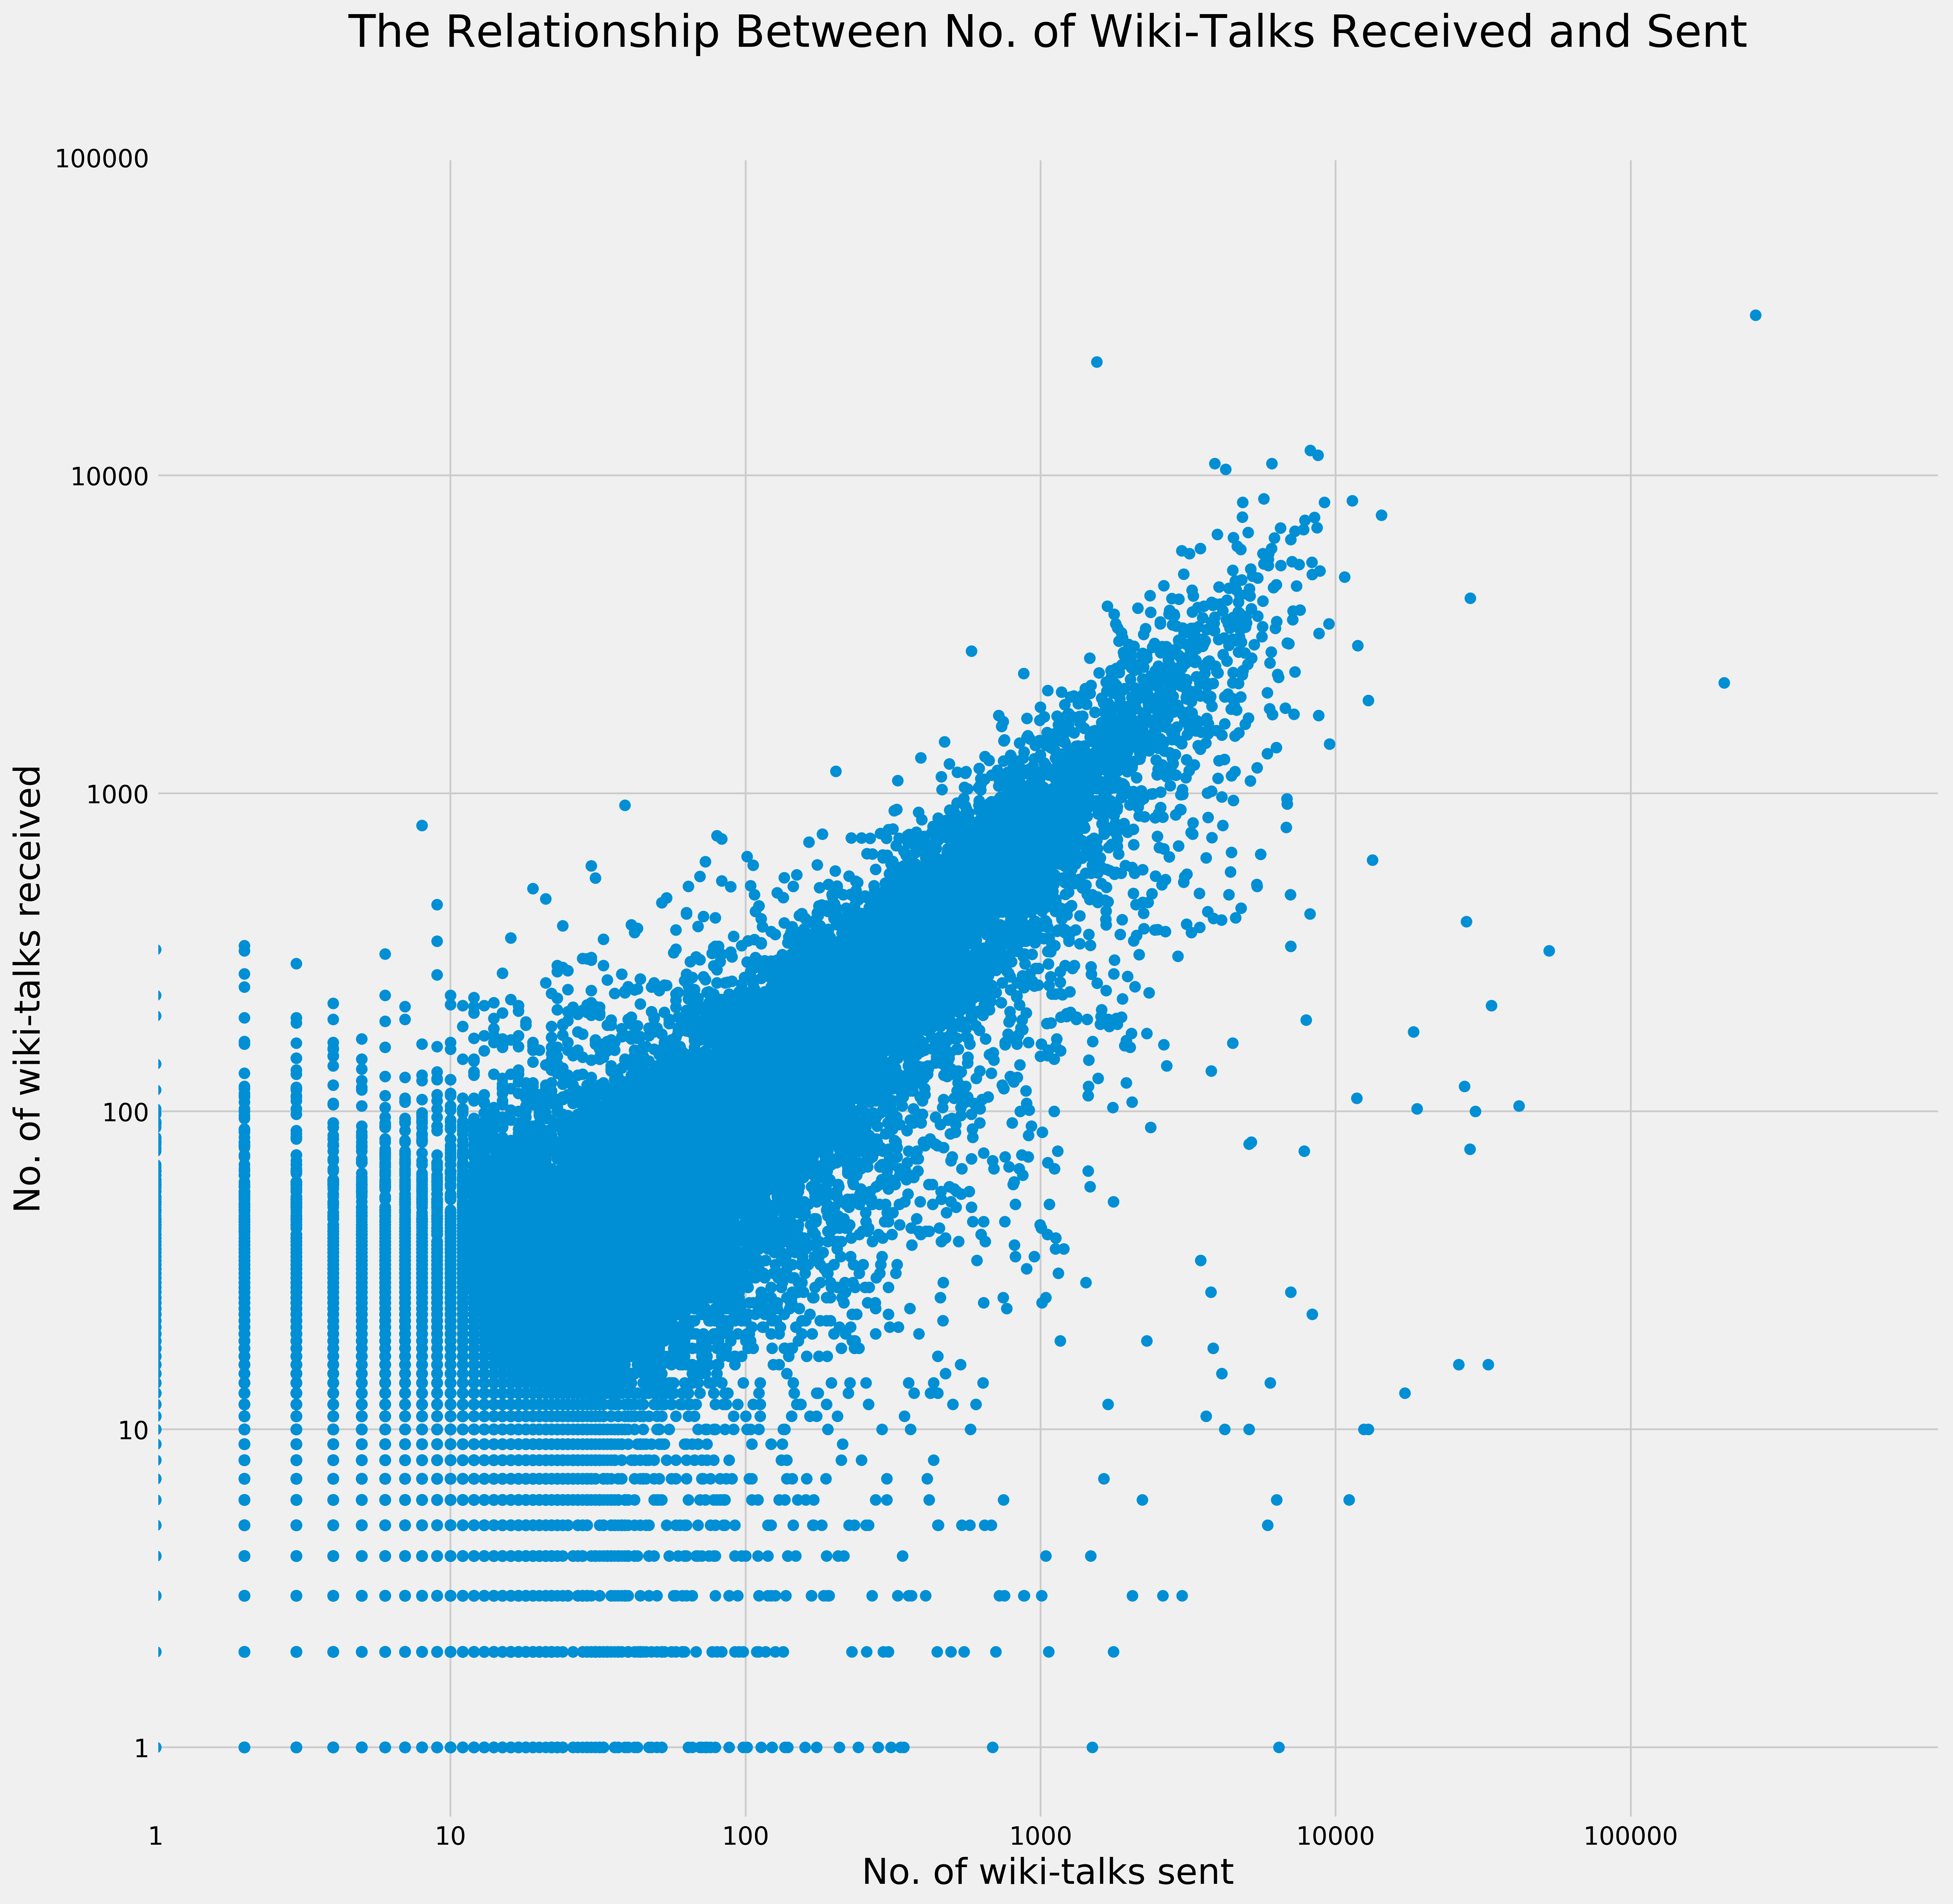

In [17]:
from matplotlib.ticker import ScalarFormatter
fig = plt.figure(figsize=(16,16), dpi=400)
ax = fig.add_subplot(111)
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(inout["to_node_count"], inout["from_node_count"])
ax = plt.gca()
plt.title("The Relationship Between No. of Wiki-Talks Received and Sent\n\n", fontsize=25)
plt.xlabel("No. of wiki-talks sent", fontsize=20)
plt.ylabel("No. of wiki-talks received", fontsize=20)
ax.set_yticks([1, 10, 100,1000,10000,100000]) # note that with a log axis, you can't have x = 0 so that value isn't plotted.
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([1, 10, 100,1000,10000,100000]) # note that with a log axis, you can't have x = 0 so that value isn't plotted.
ax.xaxis.set_major_formatter(ScalarFormatter())
fig.savefig("new.png")

## Some weird guys: many sent and received talks, but more than half of them are self-sent and self-received

In [18]:
duplicated = edf[edf["from_node"] == edf["to_node"]]
# duplicated.sort_values(by="from_node")
dg = duplicated.groupby("from_node").agg({"to_node":"count"})
self_reply = pd.merge(dg, edf_g, how="left",on="from_node")
self_reply = pd.merge(self_reply, edf_g2, how="left", left_on="from_node", right_on="to_node")
self_reply.drop(columns=["to_node_y"], inplace=True)
self_reply.columns=["node", "self-talk", "sent", "received"]
self_reply["self/sent"] = self_reply["self-talk"] / self_reply["sent"]
self_reply["self/received"] = self_reply["self-talk"] / self_reply["received"]
self_reply

,node,self-talk,sent,received,self/sent,self/received
0,2,61,275,301,0.221818,0.202658
1,3,347,5104,4401,0.067986,0.078846
2,5,154,1341,857,0.114840,0.179697
3,6,10,1766,52,0.005663,0.192308
4,7,459,1602,1230,0.286517,0.373171
5,11,5,16,22,0.312500,0.227273
6,12,151,881,696,0.171396,0.216954
7,13,18,212,117,0.084906,0.153846
8,16,1049,2210,2701,0.474661,0.388375
9,19,786,3137,2086,0.250558,0.376798


(array([  6243.,  10408.,   8506.,  10321.,  12910.,   4347.,   5952.,
          4980.,   2780., 112403.]),
 array([3.03942129e-05, 1.00027355e-01, 2.00024315e-01, 3.00021276e-01,
        4.00018237e-01, 5.00015197e-01, 6.00012158e-01, 7.00009118e-01,
        8.00006079e-01, 9.00003039e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

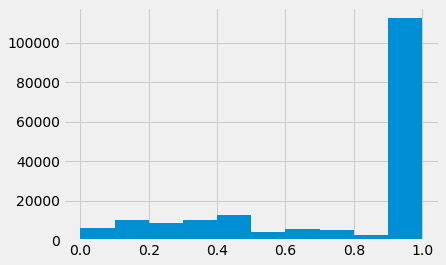

In [19]:
plt.hist(self_reply["self/sent"])

In [20]:
self_reply["self/sent_rounded"] = self_reply["self/sent"].apply(round_to_tenth)
self_reply["self/received_rounded"] = self_reply["self/received"].apply(round_to_tenth)
self_reply

,node,self-talk,sent,received,self/sent,self/received,self/sent_rounded,self/received_rounded
0,2,61,275,301,0.221818,0.202658,0.2,0.2
1,3,347,5104,4401,0.067986,0.078846,0.1,0.1
2,5,154,1341,857,0.114840,0.179697,0.1,0.2
3,6,10,1766,52,0.005663,0.192308,0.0,0.2
4,7,459,1602,1230,0.286517,0.373171,0.3,0.4
5,11,5,16,22,0.312500,0.227273,0.3,0.2
6,12,151,881,696,0.171396,0.216954,0.2,0.2
7,13,18,212,117,0.084906,0.153846,0.1,0.2
8,16,1049,2210,2701,0.474661,0.388375,0.5,0.4
9,19,786,3137,2086,0.250558,0.376798,0.3,0.4


In [21]:
weird = self_reply[(self_reply["self/sent_rounded"] > 0.5)&(self_reply["self/received_rounded"] > 0.5)&(self_reply["sent"] > 1000)&(self_reply["received"] > 1000)]
weird

,node,self-talk,sent,received,self/sent,self/received,self/sent_rounded,self/received_rounded
694,805,879,1168,1210,0.752568,0.726446,0.8,0.7
2192,2462,902,1595,1586,0.565517,0.568726,0.6,0.6
2519,2894,2187,3795,3455,0.576285,0.632996,0.6,0.6
3398,4047,939,1029,1249,0.912536,0.751801,0.9,0.8
4116,5033,2216,3230,3305,0.686068,0.670499,0.7,0.7
5786,7426,2143,3535,3567,0.606223,0.600785,0.6,0.6
5951,7652,1396,1608,1996,0.868159,0.699399,0.9,0.7
7513,9851,834,1513,1339,0.551223,0.622853,0.6,0.6
8497,11168,2690,2836,2784,0.948519,0.966236,0.9,1.0
10413,14134,1304,1682,1847,0.775268,0.706010,0.8,0.7


In [22]:
pd.merge(weird, name_df, on="node")

,node,self-talk,sent,received,self/sent,self/received,self/sent_rounded,self/received_rounded,name
0,805,879,1168,1210,0.752568,0.726446,0.8,0.7,Ancheta_Wis
1,2462,902,1595,1586,0.565517,0.568726,0.6,0.6,Gwen_Gale
2,2894,2187,3795,3455,0.576285,0.632996,0.6,0.6,Filll
3,4047,939,1029,1249,0.912536,0.751801,0.9,0.8,T._Anthony
4,5033,2216,3230,3305,0.686068,0.670499,0.7,0.7,Light_current
5,7426,2143,3535,3567,0.606223,0.600785,0.6,0.6,Andreasegde
6,7652,1396,1608,1996,0.868159,0.699399,0.9,0.7,Sheynhertz-Unbayg
7,9851,834,1513,1339,0.551223,0.622853,0.6,0.6,Gidonb
8,11168,2690,2836,2784,0.948519,0.966236,0.9,1.0,HailFire
9,14134,1304,1682,1847,0.775268,0.706010,0.8,0.7,Athaenara


## Timestamp dynamics for big interactor (large sender as well as large receiver)

In [23]:
fit = inout[(inout["to_node_count"] > 1000)&(inout["from_node_count"] > 1000)]
node_lst = list(fit["to_node"])
node_lst

[3,
 7,
 16,
 19,
 26,
 37,
 44,
 52,
 54,
 65,
 66,
 70,
 73,
 78,
 79,
 85,
 87,
 88,
 90,
 92,
 111,
 123,
 132,
 133,
 134,
 136,
 137,
 138,
 140,
 144,
 147,
 148,
 151,
 155,
 161,
 166,
 167,
 171,
 178,
 200,
 208,
 210,
 212,
 213,
 216,
 218,
 222,
 229,
 248,
 249,
 251,
 268,
 276,
 289,
 302,
 305,
 310,
 316,
 337,
 346,
 360,
 365,
 369,
 372,
 376,
 381,
 391,
 392,
 393,
 396,
 400,
 401,
 403,
 405,
 410,
 414,
 419,
 425,
 428,
 430,
 433,
 438,
 439,
 449,
 450,
 454,
 464,
 465,
 466,
 496,
 499,
 500,
 501,
 506,
 510,
 525,
 528,
 540,
 553,
 556,
 624,
 632,
 638,
 639,
 703,
 704,
 716,
 728,
 740,
 749,
 751,
 758,
 762,
 771,
 776,
 781,
 791,
 796,
 800,
 805,
 806,
 808,
 820,
 823,
 827,
 828,
 834,
 844,
 848,
 851,
 857,
 861,
 862,
 864,
 871,
 884,
 889,
 890,
 891,
 896,
 898,
 903,
 906,
 910,
 918,
 924,
 925,
 926,
 935,
 940,
 943,
 952,
 953,
 955,
 959,
 962,
 968,
 969,
 988,
 991,
 992,
 996,
 1004,
 1005,
 1009,
 1010,
 1020,
 1022,
 1023,
 

### Sent wiki-talk

In [24]:
new_df = tf[tf["from_node"].isin(node_lst)].reset_index(drop=True).reset_index()
new_df_g = new_df.groupby("from_node")
new_df_g["timestamp"]

In [25]:
df_max = new_df.groupby("from_node").max()[["timestamp"]]
df_min = new_df.groupby("from_node").min()[["timestamp"]]

In [26]:
df_range = df_max - df_min
df_range

,timestamp
from_node,
3,146088469
7,118397677
16,58582830
19,192416161
26,69772584
37,196723240
44,189499723
52,185135986
54,190144589


In [27]:
new_df_idx = new_df.set_index(["from_node"])[["timestamp"]]

In [28]:
df_perc = (new_df_idx - df_min) / df_range
df_perc

,timestamp
from_node,
3,0.195954
3,0.118383
3,0.031315
3,0.049541
3,0.085230
3,0.088896
3,0.088897
3,0.108991
3,0.114712


In [29]:
df_perc_rounded = df_perc.apply(round_to_tenth)
df_perc_rounded.head(10)

,timestamp
from_node,
3,0.2
3,0.1
3,0.0
3,0.0
3,0.1
3,0.1
3,0.1
3,0.1
3,0.1


In [30]:
df_perc_rounded_idx = df_perc_rounded.reset_index()
dfgg = df_perc_rounded_idx.groupby(["from_node", "timestamp"]).agg({"timestamp":"count"})
dfgg.columns = ['_'.join(t) if t[1]!='' else t[0] for t in dfgg.columns]
dfgg_perc = dfgg.groupby(level=[0]).apply(lambda g: g / g.sum())
dfgg_perc

t_i_m_e_s_t_a_m_p
from_node timestamp                   
3         0.0                 0.009404
          0.1                 0.051724
          0.2                 0.078174
          0.4                 0.000392
          0.5                 0.000392
          0.7                 0.131857
          0.8                 0.228056
          0.9                 0.236677
          1.0                 0.263323
7         0.0                 0.007491
          0.1                 0.302122
          0.2                 0.263421
          0.3                 0.023720
          0.4                 0.127341
          0.5                 0.227840
          0.6                 0.025593
          0.7                 0.016230
          0.9                 0.002497
          1.0                 0.003745
16        0.0                 0.008145
          0.1                 0.021267
          0.2                 0.039819
          0.3                 0.167873
          0.4                 0.166968
          0.5                 0.205882
          0.6                 0.169683
          0.7                 0.159276
          0.8                 0.058824
          1.0                 0.002262
19        0.0                 0.000638
...                                ...
36383     0.0                 0.025163
          0.1                 0.080149
          0.2                 0.105312
          0.3                 0.083877
          0.4                 0.090401
          0.5                 0.088537
          0.6                 0.053122
          0.7                 0.045666
          0.8                 0.174278
          0.9                 0.188257
          1.0                 0.065238
44777     0.0                 0.439096
          0.1                 0.234136
          0.2                 0.067834
          0.3                 0.087527
          0.4                 0.088986
          0.5                 0.035740
          0.6                 0.015317
          0.7                 0.023341
          1.0                 0.008023
54301     0.0                 0.003367
          0.2                 0.072391
          0.3                 0.003367
          0.4                 0.047138
          0.5                 0.268519
          0.6                 0.067340
          0.7                 0.214646
          0.8                 0.223906
          0.9                 0.096801
          1.0                 0.002525

[8633 rows x 1 columns]

In [31]:
to_plot = dfgg_perc.reset_index(level=[0])
to_plot.head(10)

,from_node,t_i_m_e_s_t_a_m_p
timestamp,,
0.0,3,0.009404
0.1,3,0.051724
0.2,3,0.078174
0.4,3,0.000392
0.5,3,0.000392
0.7,3,0.131857
0.8,3,0.228056
0.9,3,0.236677
1.0,3,0.263323


In [32]:
nt = pd.DataFrame({"position": list(to_plot.index), "percentage": list(to_plot["t_i_m_e_s_t_a_m_p"])})

### Received wiki-talk

In [33]:
new_df1 = tf[tf["to_node"].isin(node_lst)].reset_index(drop=True).reset_index()
new_df_g1 = new_df1.groupby("to_node")
df1_max = new_df1.groupby("to_node").max()[["timestamp"]]
df1_min = new_df1.groupby("to_node").min()[["timestamp"]]

In [34]:
df1_range = df1_max - df1_min
df1_range

,timestamp
to_node,
3,175722327
7,129385934
16,90553425
19,142938344
26,80324667
37,181847220
44,184023197
52,184821807
54,162009737


In [35]:
new_df1_idx = new_df1.set_index(["to_node"])[["timestamp"]]

df1_perc = (new_df1_idx - df1_min) / df1_range
df1_perc

,timestamp
to_node,
3,0.020016
3,0.020019
3,0.020021
3,0.020022
3,0.020030
3,0.020030
3,0.000000
3,0.001422
3,0.001427


In [36]:
df1_perc_rounded = df1_perc.apply(round_to_tenth)
df1_perc_rounded.head(10)

,timestamp
to_node,
3,0.0
3,0.0
3,0.0
3,0.0
3,0.0
3,0.0
3,0.0
3,0.0
3,0.0


In [37]:
df1_perc_rounded_idx = df1_perc_rounded.reset_index()
dfgg1 = df1_perc_rounded_idx.groupby(["to_node", "timestamp"]).agg({"timestamp":"count"})
dfgg1.columns = ['_'.join(t) if t[1]!='' else t[0] for t in dfgg1.columns]
dfgg1_perc = dfgg1.groupby(level=[0]).apply(lambda g: g / g.sum())
dfgg1_perc

t_i_m_e_s_t_a_m_p
to_node timestamp                   
3       0.0                 0.020223
        0.1                 0.102477
        0.2                 0.077255
        0.3                 0.003408
        0.4                 0.016587
        0.5                 0.002954
        0.6                 0.209498
        0.7                 0.243127
        0.8                 0.304703
        0.9                 0.015451
        1.0                 0.004317
7       0.0                 0.016260
        0.1                 0.387805
        0.2                 0.201626
        0.3                 0.013008
        0.4                 0.202439
        0.5                 0.126016
        0.6                 0.020325
        0.7                 0.004878
        0.8                 0.005691
        0.9                 0.013821
        1.0                 0.008130
16      0.0                 0.005924
        0.1                 0.046279
        0.2                 0.119215
        0.3                 0.261755
        0.4                 0.260644
        0.5                 0.232506
        0.6                 0.016290
        0.7                 0.006664
...                              ...
36383   0.1                 0.049957
        0.2                 0.086133
        0.3                 0.066322
        0.4                 0.086133
        0.5                 0.068045
        0.6                 0.044789
        0.7                 0.054264
        0.8                 0.181740
        0.9                 0.244617
        1.0                 0.092162
44777   0.0                 0.476987
        0.1                 0.278661
        0.2                 0.064435
        0.3                 0.103766
        0.4                 0.037657
        0.5                 0.017573
        0.6                 0.005858
        0.7                 0.005858
        1.0                 0.009205
54301   0.0                 0.005029
        0.1                 0.000838
        0.2                 0.072087
        0.3                 0.006706
        0.4                 0.042749
        0.5                 0.269908
        0.6                 0.062867
        0.7                 0.217938
        0.8                 0.219614
        0.9                 0.100587
        1.0                 0.001676

[8653 rows x 1 columns]

In [38]:
to_plot1 = dfgg1_perc.reset_index(level=[0])
to_plot1.head(10)

,to_node,t_i_m_e_s_t_a_m_p
timestamp,,
0.0,3,0.020223
0.1,3,0.102477
0.2,3,0.077255
0.3,3,0.003408
0.4,3,0.016587
0.5,3,0.002954
0.6,3,0.209498
0.7,3,0.243127
0.8,3,0.304703


In [39]:
nt1 = pd.DataFrame({"position": list(to_plot1.index), "percentage": list(to_plot1["t_i_m_e_s_t_a_m_p"])})

In [40]:
nt1["type"] = "received"
nt["type"] = "sent"
merged = pd.concat([nt1, nt])

/Users/lahmwang/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


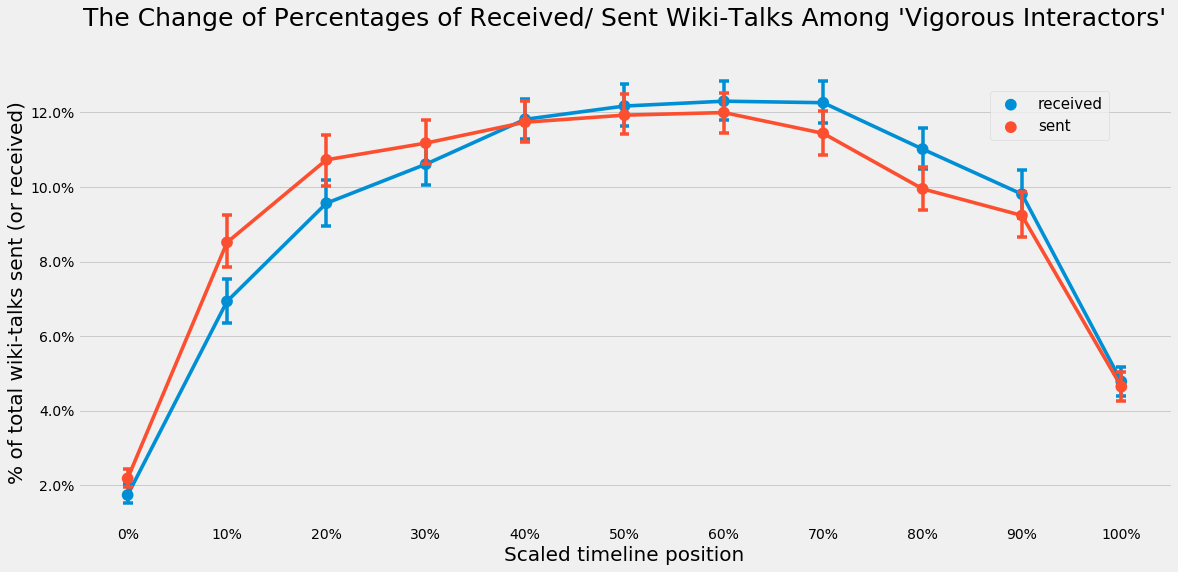

In [41]:
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
g = sns.catplot(x="position", y="percentage", data=merged, hue="type", kind="point", legend=False, capsize=0.1, scale=0.5, errwidth=3.5)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.xaxis.set_major_formatter(PercentFormatter(10))
plt.title("The Change of Percentages of Received/ Sent Wiki-Talks Among 'Vigorous Interactors'\n", fontsize=25)
plt.xlabel("Scaled timeline position", fontsize=20)
plt.ylabel("% of total wiki-talks sent (or received)", fontsize=20)
plt.legend(bbox_to_anchor=(0.95,0.95),prop={'size': 15})
g.savefig("percent.png")